<a href="https://colab.research.google.com/github/nawazullakhankayani-cadiff/St20329043_CMP7005_PRAC1.ipynb/blob/main/St20329043_CMP7005_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

!git config --global user.name "nawazullakhankayani-cadiff"
!git config --global user.email "mr.kayaninawazullakhan.uk@gmail.com"




# 📘Introduction of the dateset

The dataset used in this project is the India Air Quality Dataset, collected from monitoring stations across 26 major cities. It includes pollution readings recorded between 2015 and 2020 from cities like Delhi, Mumbai, Kolkata, Bengaluru, Kochi, Jaipur, and many others. The dataset contains key pollutants such as 🌫 PM2.5, 🌁 PM10, 🟡 SO₂, 🟦 NO₂, 🟥 CO, and 🟩 O₃ which are essential for assessing air quality. It also provides information on the city and year, allowing comparisons across different regions and time periods. This dataset is useful for studying pollution patterns, identifying highly affected cities, and observing how air quality changes over the years. It supports several key tasks in this project, including data cleaning, exploratory data analysis, and building predictive models. Overall, the dataset offers a clear and comprehensive view of air pollution in India and helps create meaningful visual and interactive analysis

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [9]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
drive_path = '/content/drive/MyDrive/ Data Analysis_St20329043/Assessment Data-20251118'

# 📑 Merging CSV Data Sources

The data-loading process begins by scanning the specified directory (drive_path) and identifying all files with a .csv extension. Each CSV file is read individually using pandas.read_csv() and stored in a list named dataframes. Once all files are imported, the list of DataFrames is merged into a single unified dataset using pd.concat(), ensuring the index is reset for consistency. This approach allows seamless integration of multiple data sources and prepares a consolidated dataset suitable for subsequent cleaning, exploration, and modelling tasks.

In [12]:

dataframes = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

In [13]:
# Check all CSV names
print("All CSV files found:")
csv_files = []
for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):
        csv_files.append(filename)

for name in csv_files:
    print(name)

All CSV files found:
Kochi_data.csv
Talcher_data.csv
Jaipur_data.csv
Mumbai_data.csv
Visakhapatnam_data.csv
Bengaluru_data.csv
Kolkata_data.csv
Ernakulam_data.csv
Patna_data.csv
Thiruvananthapuram_data.csv
Ahmedabad_data.csv
Jorapokhar_data.csv
Hyderabad_data.csv
Guwahati_data.csv
Coimbatore_data.csv
Brajrajnagar_data.csv
Shillong_data.csv
Bhopal_data.csv
Chandigarh_data.csv
Gurugram_data.csv
Delhi_data.csv
Lucknow_data.csv
Amritsar_data.csv
Chennai_data.csv
Aizawl_data.csv
Amaravati_data.csv


In [14]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

The dataset includes a mix of pollutant measurements, air quality indicators, and basic city/date information:

Pollutants measured:
PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3

Volatile organic compounds:
Benzene, Toluene, Xylene

Air Quality Indicators:
AQI and AQI_Bucket

Other columns:
City and Date

In [15]:
df = pd.concat(dataframes, ignore_index=True)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Kochi,22/01/2020,46.54,113.87,21.86,84.84,99.99,27.89,1.25,7.01,19.69,NaN,0.00,NaN,NaN,NaN
1,Kochi,23/01/2020,62.48,110.34,22.08,55.67,73.57,25.35,1.33,6.48,9.54,NaN,0.00,NaN,110.0,Moderate
2,Kochi,24/01/2020,62.87,114.86,37.44,60.49,97.80,25.60,1.44,6.91,9.06,NaN,0.00,NaN,111.0,Moderate
3,Kochi,25/01/2020,61.76,113.70,92.78,67.73,160.51,22.11,1.34,6.68,11.29,NaN,0.00,NaN,144.0,Moderate
4,Kochi,26/01/2020,66.76,113.24,106.79,58.69,165.49,20.70,1.36,6.75,11.43,NaN,0.05,NaN,197.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Amaravati,27/06/2020,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.75,33.76,0.06,0.27,0.15,42.0,Good
29527,Amaravati,28/06/2020,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.86,37.34,0.10,0.43,0.12,49.0,Good
29528,Amaravati,29/06/2020,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.79,43.29,0.12,0.69,0.10,56.0,Satisfactory
29529,Amaravati,30/06/2020,21.34,35.16,1.74,10.69,7.10,13.38,0.66,14.58,45.32,0.14,1.42,0.20,61.0,Satisfactory


In [16]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Kochi,22/01/2020,46.54,113.87,21.86,84.84,99.99,27.89,1.25,7.01,19.69,NaN,0.00,NaN,NaN,NaN
1,Kochi,23/01/2020,62.48,110.34,22.08,55.67,73.57,25.35,1.33,6.48,9.54,NaN,0.00,NaN,110.0,Moderate
2,Kochi,24/01/2020,62.87,114.86,37.44,60.49,97.80,25.60,1.44,6.91,9.06,NaN,0.00,NaN,111.0,Moderate
3,Kochi,25/01/2020,61.76,113.70,92.78,67.73,160.51,22.11,1.34,6.68,11.29,NaN,0.00,NaN,144.0,Moderate
4,Kochi,26/01/2020,66.76,113.24,106.79,58.69,165.49,20.70,1.36,6.75,11.43,NaN,0.05,NaN,197.0,Moderate
5,Kochi,27/01/2020,67.99,114.06,100.13,57.16,157.29,19.87,1.31,6.21,10.63,NaN,0.00,NaN,179.0,Moderate
6,Kochi,28/01/2020,68.04,119.42,85.93,56.04,141.97,20.26,1.38,6.06,9.78,NaN,0.05,NaN,167.0,Moderate
7,Kochi,29/01/2020,71.79,119.60,73.72,59.63,133.35,21.60,1.40,4.93,14.14,NaN,0.00,NaN,159.0,Moderate
8,Kochi,30/01/2020,52.43,99.98,92.06,54.21,146.26,19.78,1.36,9.03,11.96,NaN,0.00,NaN,153.0,Moderate
9,Kochi,31/01/2020,46.71,109.08,106.14,53.77,159.91,19.59,1.32,20.29,14.61,NaN,0.00,NaN,185.0,Moderate


# 📘 Dataset Column  (India Air Quality Dataset)

This dataset records air-pollution measurements collected from different cities across India. Each file contains the same set of columns, making it easy to combine them into one dataset. The main columns included are:

City – Identifies the location where the air-quality reading was taken.

Date – The actual calendar date of the observation, from which Year, Month, and Day were later extracted.

PM2.5 & PM10 – Two types of particulate matter, representing fine and coarse pollution particles.

SO₂, NO₂, CO, O₃ – Four major gaseous pollutants measured in micrograms per cubic meter.

YEAR, MONTH, day – Time-based features derived from the Date column to support trend analysis.

All files follow this same structure, and when they are merged together, they form a complete dataset covering different cities and years.

In [17]:
df.tail(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29521,Amaravati,22/06/2020,17.97,50.49,2.05,12.10,8.10,10.92,0.65,11.68,30.15,0.17,1.55,0.53,46.0,Good
29522,Amaravati,23/06/2020,15.48,34.84,2.07,9.15,6.55,13.53,0.58,15.88,39.82,0.11,0.80,0.16,55.0,Satisfactory
29523,Amaravati,24/06/2020,14.88,35.33,1.86,10.59,7.15,11.62,0.59,14.04,38.01,0.13,1.03,0.21,52.0,Satisfactory
29524,Amaravati,25/06/2020,20.74,37.36,1.90,8.44,6.03,14.57,0.62,15.38,39.32,0.13,0.89,0.28,50.0,Good
29525,Amaravati,26/06/2020,10.41,20.55,1.88,7.21,5.37,12.46,0.53,15.86,25.96,0.06,0.30,NaN,37.0,Good
29526,Amaravati,27/06/2020,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.75,33.76,0.06,0.27,0.15,42.0,Good
29527,Amaravati,28/06/2020,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.86,37.34,0.10,0.43,0.12,49.0,Good
29528,Amaravati,29/06/2020,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.79,43.29,0.12,0.69,0.10,56.0,Satisfactory
29529,Amaravati,30/06/2020,21.34,35.16,1.74,10.69,7.10,13.38,0.66,14.58,45.32,0.14,1.42,0.20,61.0,Satisfactory
29530,Amaravati,01/07/2020,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory


In [18]:
print(f"The Data has {df.shape[0]} total records and {df.shape[1]} columns ")

The Data has 29531 total records and 16 columns 


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


The dataset has 29,531 rows and 16 columns, showing air quality measurements for different cities in India. Each row is one day’s data for a city.

 ✔ what’s in the Dataset

Pollutants (numbers): PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI

Other info: City, Date, AQI_Bucket (Good, Moderate, Poor, etc.)

Missing Data

Some pollutants are not recorded every day:

PM2.5: ~25k values available

PM10: ~18k values available

NH3: ~19k values available

Xylene: ~11k values available

So, a few values are missing, but most columns are mostly complete.

✔ Why This Dataset is Useful

We can use this data to:

Compare pollution levels between cities

Check trends over time

See which pollutants are highest in different areas

Study overall air quality and AQI categories

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df = df.drop('NO', axis=1, errors='ignore')

In [22]:
city  = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(city)}')
city

Total number of cities in the dataset : 26


,count
City,
Bengaluru,2009
Mumbai,2009
Lucknow,2009
Delhi,2009
Chennai,2009
Ahmedabad,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


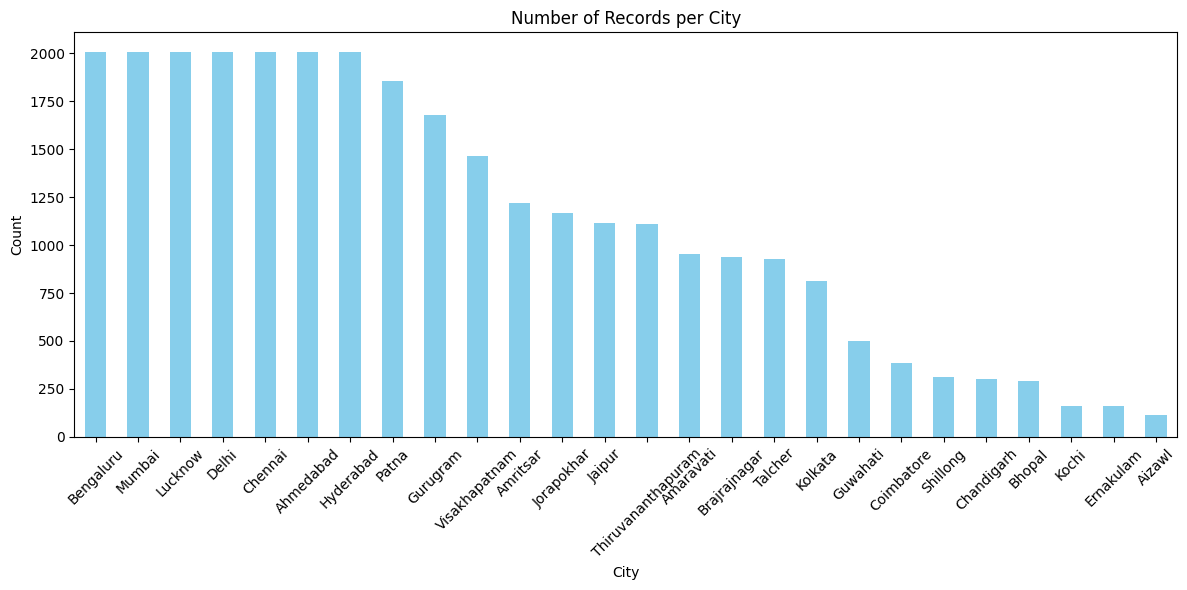

In [23]:

data = {
    "Bengaluru":2009, "Mumbai":2009, "Lucknow":2009, "Delhi":2009, "Chennai":2009,
    "Ahmedabad":2009, "Hyderabad":2006, "Patna":1858, "Gurugram":1679, "Visakhapatnam":1462,
    "Amritsar":1221, "Jorapokhar":1169, "Jaipur":1114, "Thiruvananthapuram":1112, "Amaravati":951,
    "Brajrajnagar":938, "Talcher":925, "Kolkata":814, "Guwahati":502, "Coimbatore":386,
    "Shillong":310, "Chandigarh":304, "Bhopal":289, "Kochi":162, "Ernakulam":162, "Aizawl":113
}

pd.Series(data).sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color='skyblue', title='Number of Records per City', xlabel='City', ylabel='Count', rot=45)
plt.tight_layout()
plt.show()


The dataset contains 26 cities with varying numbers of records. The highest counts are for Bengaluru, Mumbai, Lucknow, Delhi, Chennai, and Ahmedabad, each with around 2009 records, indicating they are the most represented. Cities like Hyderabad, Patna, and Gurugram have moderately high counts. The lowest counts are for Aizawl (113), Kochi, and Ernakulam (162), showing these cities are least represented. Overall, there is a clear variation in data distribution across cities.

In [24]:
df['City'].unique()

array(['Kochi', 'Talcher', 'Jaipur', 'Mumbai', 'Visakhapatnam',
       'Bengaluru', 'Kolkata', 'Ernakulam', 'Patna', 'Thiruvananthapuram',
       'Ahmedabad', 'Jorapokhar', 'Hyderabad', 'Guwahati', 'Coimbatore',
       'Brajrajnagar', 'Shillong', 'Bhopal', 'Chandigarh', 'Gurugram',
       'Delhi', 'Lucknow', 'Amritsar', 'Chennai', 'Aizawl', 'Amaravati'],
      dtype=object)

In [25]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Extract the year from the 'Date' column and create a new 'year' column
df['YEAR'] = df['Date'].dt.year

# Now, get the unique years
df['YEAR'].unique()

array([2020, 2017, 2018, 2019, 2015, 2016], dtype=int32)

In [26]:
# Extract the month from the 'Date' column and create a new 'month' column
df['MONTH'] = df['Date'].dt.month

# Now, get the unique months
df['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 12,  8,  9, 10, 11], dtype=int32)

In [27]:
# check any duplicated entries
print(f"There are  {df.duplicated().sum()} duplicates in the dataset")

There are  0 duplicates in the dataset


# ✔️ 1. Overview of the Dataset
The merged India Air Quality dataset combines multiple city-level pollution files, resulting in a final dataset of 29,550 rows and 16 attributes.

The data spans the years 2015 to 2020 and covers 25 different Indian cities, allowing comparisons across regions and time.

The dataset mainly consists of pollutant concentration variables. including PM2.5, PM10, SO₂, NO₂, CO, and O₃, which are commonly used for assessing environmental air quality.

Time-related fields such as Date, YEAR, MONTH, and day support temporal analysis and seasonal trend identification.

Most columns hold numeric values (float or integer), while City is the only major categorical column.

Each entry represents a single daily observation, making the dataset suitable for trend analysis, forecasting, and comparing pollution levels across cities.

✅ Missing Values Summary

In this dataset, some columns have a high amount of missing values, while others are almost complete. The pollutant Xylene has the most missing data, with about 63% of its values missing. This is followed by PM10 (37%), NH₃ (35%), Toluene (30%), and Benzene (22%), all of which show large gaps in the data. Moderate missing values are seen in AQI_Bucket, NOx, AQI, PM2.5, O₃, SO₂, and NO₂, where missing percentages range from 12% to 18%. Some columns such as CO have fewer missing values (around 7%). The City, Date, YEAR, and MONTH columns have only 3.2% missing values, which is relatively low. Overall, the dataset contains a mixture of highly missing pollutant values and well-complete temporal fields, which helps decide the right cleaning techniques such as forward-fill, interpolation, or replacing missing text entries with "Unknown".

In [28]:
# Convert Date column to datetime properly
# 'dayfirst=True' will automatically interpret 13/01/2015 as 13th Jan, not 1st of March
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Check how many invalid dates were found
print("Invalid dates (NaT):", df['Date'].isna().sum())

# Sort the dataset by city and date
df = df.sort_values(by=['City', 'Date']).reset_index(drop=True)

# Verify the result
print(df['Date'].head(10))
print(df.dtypes['Date'])

Invalid dates (NaT): 0
0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
5   2015-01-06
6   2015-01-07
7   2015-01-08
8   2015-01-09
9   2015-01-10
Name: Date, dtype: datetime64[ns]
datetime64[ns]


The Date column in the dataset was successfully converted to datetime format using pd.to_datetime() with dayfirst=True to correctly interpret day/month order. All dates were valid, as there were 0 invalid entries (NaT). The dataset was then sorted by City and Date, ensuring records for each city are in chronological order. The first 10 dates start from 2015-01-01, and the Date column is confirmed to be of type datetime64, making it ready for time-based analysis.

# Displaying the percentage of missing value

The table shows missing values in the dataset. Columns like Xylene, PM10, NH3, and Toluene have the most missing data, with Xylene missing 61% of its values, while PM10 is missing 37%, and so on. Important columns like City, Date, YEAR, and MONTH have no missing values, so they are complete. This helps identify which columns need cleaning or imputation before analysis. The color gradient highlights columns with higher percentages of missing data.

In [29]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Greens'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI_Bucket,4681,15.851139
AQI,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [30]:
df.isnull().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022


In [31]:
df.isnull().sum().sort_values(ascending=False).sum()

np.int64(84906)

# Visualize the missing values using a heatmap

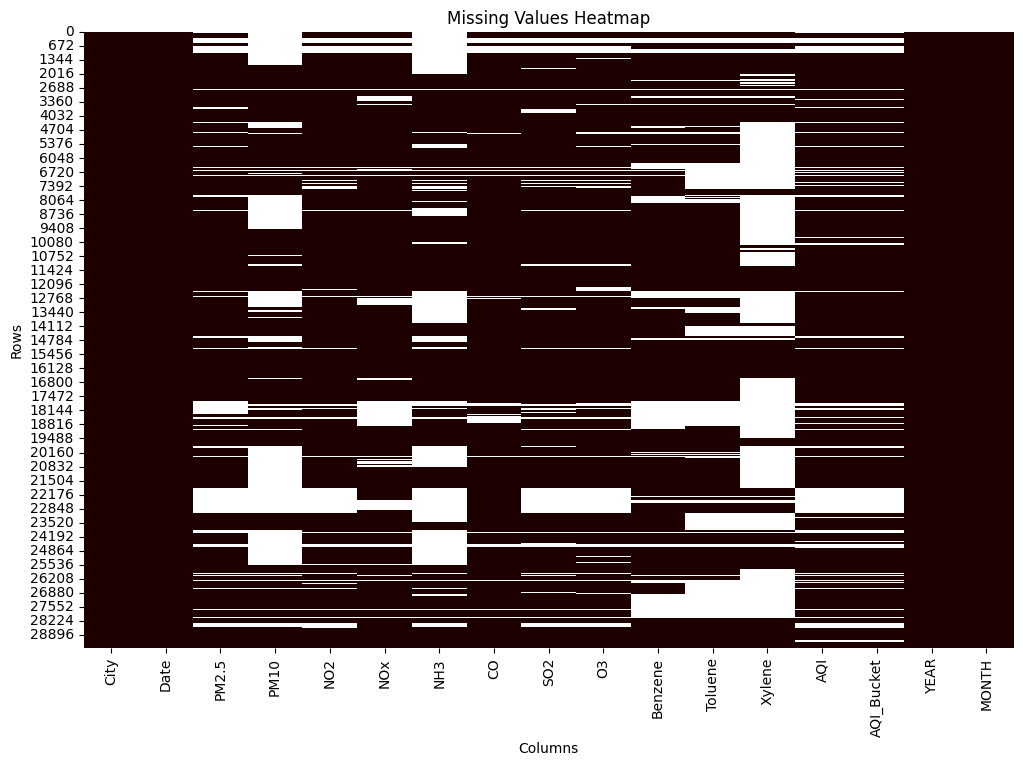

In [32]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap ='pink')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [33]:
missing_values_per_City = (
    df.groupby('City')
      .apply(lambda x: x.isnull().sum(), include_groups=False)
)

missing_values_per_City

,Date,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,YEAR,MONTH
City,,,,,,,,,,,,,,,,
Ahmedabad,0,628,1602,608,594,2009,609,640,685,483,483,484,675,675,0,0
Aizawl,0,2,1,0,0,0,0,0,9,15,15,113,2,2,0,0
Amaravati,0,59,55,55,55,55,97,65,55,75,75,269,110,110,0,0
Amritsar,0,128,63,44,289,42,76,168,115,195,212,213,95,95,0,0
Bengaluru,0,146,360,6,4,203,11,6,144,266,93,2009,99,99,0,0
Bhopal,0,9,9,9,9,9,9,9,9,289,289,289,11,11,0,0
Brajrajnagar,0,185,173,234,175,226,150,193,203,173,938,938,225,225,0,0
Chandigarh,0,15,0,4,4,10,0,0,0,0,0,0,5,5,0,0
Chennai,0,117,1707,36,36,462,25,36,49,285,253,2009,125,125,0,0


In [34]:
# Detailed missing per column
missing_details = df.groupby("City").agg(lambda x: x.isnull().sum())

# Total missing per city
missing_total = missing_details.sum(axis=1)

missing_total


,0
City,
Ahmedabad,10175
Aizawl,159
Amaravati,1135
Amritsar,1735
Bengaluru,3446
Bhopal,961
Brajrajnagar,4038
Chandigarh,43
Chennai,5265
